/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


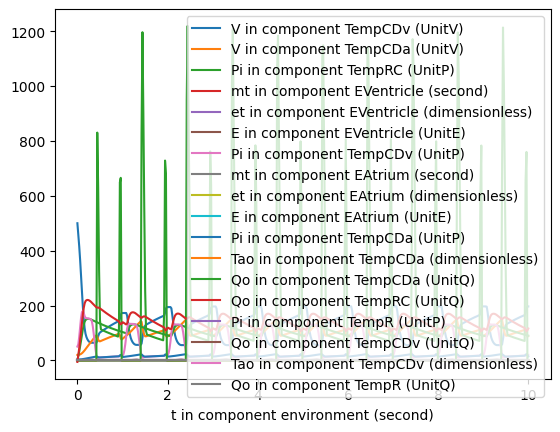

In [1]:
# Size of variable arrays:
sizeAlgebraic = 15
sizeStates = 3
sizeConstants = 21
from math import *
from numpy import *

def createLegends():
    legend_states = [""] * sizeStates
    legend_rates = [""] * sizeStates
    legend_algebraic = [""] * sizeAlgebraic
    legend_voi = ""
    legend_constants = [""] * sizeConstants
    legend_voi = "t in component environment (second)"
    legend_algebraic[7] = "Pi in component TempCDa (UnitP)"
    legend_algebraic[11] = "Pi in component TempR (UnitP)"
    legend_algebraic[10] = "Qo in component TempRC (UnitQ)"
    legend_algebraic[12] = "Qo in component TempCDv (UnitQ)"
    legend_algebraic[3] = "Pi in component TempCDv (UnitP)"
    legend_algebraic[9] = "Qo in component TempCDa (UnitQ)"
    legend_constants[0] = "CVao in component ParaLeftHeart (UnitCV)"
    legend_algebraic[2] = "E in component EVentricle (UnitE)"
    legend_states[0] = "V in component TempCDv (UnitV)"
    legend_constants[1] = "PlvIni in component ParaLeftHeart (UnitP)"
    legend_constants[2] = "VlvIni in component ParaLeftHeart (UnitV)"
    legend_algebraic[13] = "Tao in component TempCDv (dimensionless)"
    legend_constants[3] = "Vlv0 in component ParaLeftHeart (UnitV)"
    legend_constants[4] = "CVmi in component ParaLeftHeart (UnitCV)"
    legend_algebraic[6] = "E in component EAtrium (UnitE)"
    legend_states[1] = "V in component TempCDa (UnitV)"
    legend_constants[5] = "PlaIni in component ParaLeftHeart (UnitP)"
    legend_constants[6] = "VlaIni in component ParaLeftHeart (UnitV)"
    legend_algebraic[8] = "Tao in component TempCDa (dimensionless)"
    legend_constants[7] = "Vla0 in component ParaLeftHeart (UnitV)"
    legend_constants[8] = "ElvMax in component ParaLeftHeart (UnitE)"
    legend_constants[9] = "ElvMin in component ParaLeftHeart (UnitE)"
    legend_constants[10] = "T in component ParaLeftHeart (second)"
    legend_constants[11] = "Ts1 in component ParaLeftHeart (dimensionless)"
    legend_constants[12] = "Ts2 in component ParaLeftHeart (dimensionless)"
    legend_algebraic[0] = "mt in component EVentricle (second)"
    legend_algebraic[1] = "et in component EVentricle (dimensionless)"
    legend_constants[13] = "ElaMax in component ParaLeftHeart (UnitE)"
    legend_constants[14] = "ElaMin in component ParaLeftHeart (UnitE)"
    legend_constants[15] = "Tpwb in component ParaLeftHeart (dimensionless)"
    legend_constants[16] = "Tpww in component ParaLeftHeart (dimensionless)"
    legend_algebraic[4] = "mt in component EAtrium (second)"
    legend_algebraic[5] = "et in component EAtrium (dimensionless)"
    legend_states[2] = "Pi in component TempRC (UnitP)"
    legend_algebraic[14] = "Qo in component TempR (UnitQ)"
    legend_constants[17] = "Rc in component ParaWestkessel (UnitR)"
    legend_constants[18] = "Rv in component ParaWestkessel (UnitR)"
    legend_constants[19] = "Cv in component ParaWestkessel (UnitC)"
    legend_constants[20] = "P0v in component ParaWestkessel (UnitP)"
    legend_rates[0] = "d/dt V in component TempCDv (UnitV)"
    legend_rates[1] = "d/dt V in component TempCDa (UnitV)"
    legend_rates[2] = "d/dt Pi in component TempRC (UnitP)"
    return (legend_states, legend_algebraic, legend_voi, legend_constants)

def initConsts():
    constants = [0.0] * sizeConstants; states = [0.0] * sizeStates;
    constants[0] = 350.
    constants[1] = 1.0
    constants[2] = 5.0
    constants[3] = 500
    constants[4] = 400.
    constants[5] = 1.0
    constants[6] = 4.0
    constants[7] = 20
    constants[8] = 2.5
    constants[9] = 0.1
    constants[10] = 1.0
    constants[11] = 0.3
    constants[12] = 0.45
    constants[13] = 0.25
    constants[14] = 0.15
    constants[15] = 0.92
    constants[16] = 0.09
    constants[17] = 0.005
    constants[18] = 0.65
    constants[19] = 2.6
    constants[20] = 0.
    states[0] = constants[3]
    states[1] = constants[7]
    states[2] = constants[20]
    return (states, constants)

def computeRates(voi, states, constants):
    rates = [0.0] * sizeStates; algebraic = [0.0] * sizeAlgebraic
    algebraic[4] = voi-constants[10]*floor(voi/constants[10])
    algebraic[5] = custom_piecewise([greater_equal(algebraic[4] , 0.00000) & less_equal(algebraic[4] , ((constants[15]+constants[16])-1.00000)*constants[10]), 1.00000-cos((2.00000*3.14159*(algebraic[4]-(constants[15]-1.00000)*constants[10]))/(constants[16]*constants[10])) , greater(algebraic[4] , ((constants[15]+constants[16])-1.00000)*constants[10]) & less_equal(algebraic[4] , constants[15]*constants[10]), 0.00000 , greater(algebraic[4] , constants[15]*constants[10]) & less_equal(algebraic[4] , constants[10]), 1.00000-cos((2.00000*3.14159*(algebraic[4]-constants[15]*constants[10]))/(constants[16]*constants[10])) , True, float('nan')])
    algebraic[6] = constants[14]+(algebraic[5]*(constants[13]-constants[14]))/2.00000
    algebraic[7] = constants[5]+algebraic[6]*(states[1]-constants[6])
    algebraic[10] = (states[2]-algebraic[7])/constants[18]
    algebraic[0] = voi-constants[10]*floor(voi/constants[10])
    algebraic[1] = custom_piecewise([greater_equal(algebraic[0] , 0.00000) & less_equal(algebraic[0] , constants[11]*constants[10]), 1.00000-cos((3.14159*algebraic[0])/(constants[11]*constants[10])) , greater(algebraic[0] , constants[11]*constants[10]) & less_equal(algebraic[0] , constants[12]*constants[10]), 1.00000+cos((3.14159*(algebraic[0]-constants[11]*constants[10]))/((constants[12]-constants[11])*constants[10])) , greater(algebraic[0] , constants[12]*constants[10]) & less(algebraic[0] , constants[10]), 0.00000 , True, float('nan')])
    algebraic[2] = constants[9]+(algebraic[1]*(constants[8]-constants[9]))/2.00000
    algebraic[3] = constants[1]+algebraic[2]*(states[0]-constants[2])
    algebraic[8] = custom_piecewise([greater_equal(algebraic[7] , algebraic[3]), 1.00000 , less(algebraic[7] , algebraic[3]), 0.00000 , True, float('nan')])
    algebraic[9] = custom_piecewise([greater_equal(algebraic[7] , algebraic[3]), constants[4]*algebraic[8]*(power(fabs(algebraic[7]-algebraic[3]), 0.500000)) , less(algebraic[7] , algebraic[3]), -1.00000*constants[4]*algebraic[8]*(power(fabs(algebraic[3]-algebraic[7]), 0.500000)) , True, float('nan')])
    rates[1] = algebraic[10]-algebraic[9]
    rootfind_0(voi, constants, rates, states, algebraic)
    rates[0] = algebraic[9]-algebraic[12]
    algebraic[14] = algebraic[12]
    rates[2] = (algebraic[14]-algebraic[10])/constants[19]
    return(rates)

def computeAlgebraic(constants, states, voi):
    algebraic = array([[0.0] * len(voi)] * sizeAlgebraic)
    states = array(states)
    voi = array(voi)
    algebraic[4] = voi-constants[10]*floor(voi/constants[10])
    algebraic[5] = custom_piecewise([greater_equal(algebraic[4] , 0.00000) & less_equal(algebraic[4] , ((constants[15]+constants[16])-1.00000)*constants[10]), 1.00000-cos((2.00000*3.14159*(algebraic[4]-(constants[15]-1.00000)*constants[10]))/(constants[16]*constants[10])) , greater(algebraic[4] , ((constants[15]+constants[16])-1.00000)*constants[10]) & less_equal(algebraic[4] , constants[15]*constants[10]), 0.00000 , greater(algebraic[4] , constants[15]*constants[10]) & less_equal(algebraic[4] , constants[10]), 1.00000-cos((2.00000*3.14159*(algebraic[4]-constants[15]*constants[10]))/(constants[16]*constants[10])) , True, float('nan')])
    algebraic[6] = constants[14]+(algebraic[5]*(constants[13]-constants[14]))/2.00000
    algebraic[7] = constants[5]+algebraic[6]*(states[1]-constants[6])
    algebraic[10] = (states[2]-algebraic[7])/constants[18]
    algebraic[0] = voi-constants[10]*floor(voi/constants[10])
    algebraic[1] = custom_piecewise([greater_equal(algebraic[0] , 0.00000) & less_equal(algebraic[0] , constants[11]*constants[10]), 1.00000-cos((3.14159*algebraic[0])/(constants[11]*constants[10])) , greater(algebraic[0] , constants[11]*constants[10]) & less_equal(algebraic[0] , constants[12]*constants[10]), 1.00000+cos((3.14159*(algebraic[0]-constants[11]*constants[10]))/((constants[12]-constants[11])*constants[10])) , greater(algebraic[0] , constants[12]*constants[10]) & less(algebraic[0] , constants[10]), 0.00000 , True, float('nan')])
    algebraic[2] = constants[9]+(algebraic[1]*(constants[8]-constants[9]))/2.00000
    algebraic[3] = constants[1]+algebraic[2]*(states[0]-constants[2])
    algebraic[8] = custom_piecewise([greater_equal(algebraic[7] , algebraic[3]), 1.00000 , less(algebraic[7] , algebraic[3]), 0.00000 , True, float('nan')])
    algebraic[9] = custom_piecewise([greater_equal(algebraic[7] , algebraic[3]), constants[4]*algebraic[8]*(power(fabs(algebraic[7]-algebraic[3]), 0.500000)) , less(algebraic[7] , algebraic[3]), -1.00000*constants[4]*algebraic[8]*(power(fabs(algebraic[3]-algebraic[7]), 0.500000)) , True, float('nan')])
    algebraic[14] = algebraic[12]
    return algebraic

initialGuess0 = None
def rootfind_0(voi, constants, rates, states, algebraic):
    """Calculate values of algebraic variables for DAE"""
    from scipy.optimize import fsolve
    global initialGuess0
    if initialGuess0 is None: initialGuess0 = ones(3)*0.1
    if not iterable(voi):
        soln = fsolve(residualSN_0, initialGuess0, args=(algebraic, voi, constants, rates, states), xtol=1E-6)
        initialGuess0 = soln
        algebraic[11] = soln[0]
        algebraic[12] = soln[1]
        algebraic[13] = soln[2]
    else:
        for (i,t) in enumerate(voi):
            soln = fsolve(residualSN_0, initialGuess0, args=(algebraic[:,i], voi[i], constants, rates[:i], states[:,i]), xtol=1E-6)
            initialGuess0 = soln
            algebraic[11][i] = soln[0]
            algebraic[12][i] = soln[1]
            algebraic[13][i] = soln[2]

def residualSN_0(algebraicCandidate, algebraic, voi, constants, rates, states):
    resid = array([0.0] * 3)
    algebraic[11] = algebraicCandidate[0]
    algebraic[12] = algebraicCandidate[1]
    algebraic[13] = algebraicCandidate[2]
    resid[0] = (algebraic[13]-(custom_piecewise([greater_equal(algebraic[3] , algebraic[11]), 1.00000 , less(algebraic[3] , algebraic[11]), 0.00000 , True, float('nan')])))
    resid[1] = (algebraic[12]-(custom_piecewise([greater_equal(algebraic[3] , algebraic[11]), constants[0]*algebraic[13]*(power(fabs(algebraic[3]-algebraic[11]), 0.500000)) , less(algebraic[3] , algebraic[11]), -1.00000*constants[0]*algebraic[13]*(power(fabs(algebraic[11]-algebraic[3]), 0.500000)) , True, float('nan')])))
    resid[2] = (algebraic[11]-(states[2]+constants[17]*algebraic[12]))
    return resid

def custom_piecewise(cases):
    """Compute result of a piecewise function"""
    return select(cases[0::2],cases[1::2])

def solve_model():
    """Solve model with ODE solver"""
    from scipy.integrate import ode
    # Initialise constants and state variables
    (init_states, constants) = initConsts()

    # Set timespan to solve over
    voi = linspace(0, 10, 500)

    # Construct ODE object to solve
    r = ode(computeRates)
    r.set_integrator('vode', method='bdf', atol=1e-06, rtol=1e-06, max_step=1)
    r.set_initial_value(init_states, voi[0])
    r.set_f_params(constants)

    # Solve model
    states = array([[0.0] * len(voi)] * sizeStates)
    states[:,0] = init_states
    for (i,t) in enumerate(voi[1:]):
        if r.successful():
            r.integrate(t)
            states[:,i+1] = r.y
        else:
            break

    # Compute algebraic variables
    algebraic = computeAlgebraic(constants, states, voi)
    return (voi, states, algebraic)

def plot_model(voi, states, algebraic):
    """Plot variables against variable of integration"""
    import pylab
    (legend_states, legend_algebraic, legend_voi, legend_constants) = createLegends()
    pylab.figure(1)
    pylab.plot(voi,vstack((states,algebraic)).T)
    pylab.xlabel(legend_voi)
    pylab.legend(legend_states + legend_algebraic, loc='best')
    pylab.show()

if __name__ == "__main__":
    (voi, states, algebraic) = solve_model()
    plot_model(voi, states, algebraic)